In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"] = [20, 10]

In [3]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
target_nor = np.array(
    [
        [1],
        [0],
        [0],
        [0]])

In [4]:
class MLP:
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))
        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.b12 = np.random.uniform(size=(1,num_output))
        self.losses = []
    def update_weights(self):
        loss = 0.5 * (self.target - self.output_final) ** 2
        self.losses.append(np.sum(loss))
        error_term = (self.target - self.output_final)
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))
        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))
        self.weights_01 += self.lr * grad01
        self.weights_12 += self.lr * grad12
        self.b01 += np.sum(self.lr * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.b12 += np.sum(self.lr * error_term * self._delsigmoid(self.output_final), axis=0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def _delsigmoid(self, x):
        return x * (1 - x)
    def forward(self, batch):
        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self._sigmoid(self.hidden_)
        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self._sigmoid(self.output_)
        return self.output_final
    def classify(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1
        return 0
    def plot(self, h=0.01):
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))
        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        colors = {
            0: "ro",
            1: "go"
        }
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)
        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
    def train(self):
        for epoch in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()
            if epoch % 500 == 0:
                print("Loss: ", self.losses[epoch]) 

In [56]:
mlp = MLP(train_data, target_nor, 0.2, 8000)
mlp.train()

Loss:  1.1323676381304715
Loss:  0.12118411862405816
Loss:  0.020907774169759842
Loss:  0.009163658346053743
Loss:  0.005560693746655024
Loss:  0.003906380875102094
Loss:  0.0029776474061390073
Loss:  0.002390048260181429
Loss:  0.001987703861436382
Loss:  0.0016963242150198831
Loss:  0.0014763025610240279
Loss:  0.0013047065562224315
Loss:  0.0011673900731714773
Loss:  0.0010551777980300715
Loss:  0.0009618710107974632
Loss:  0.0008831381686602412


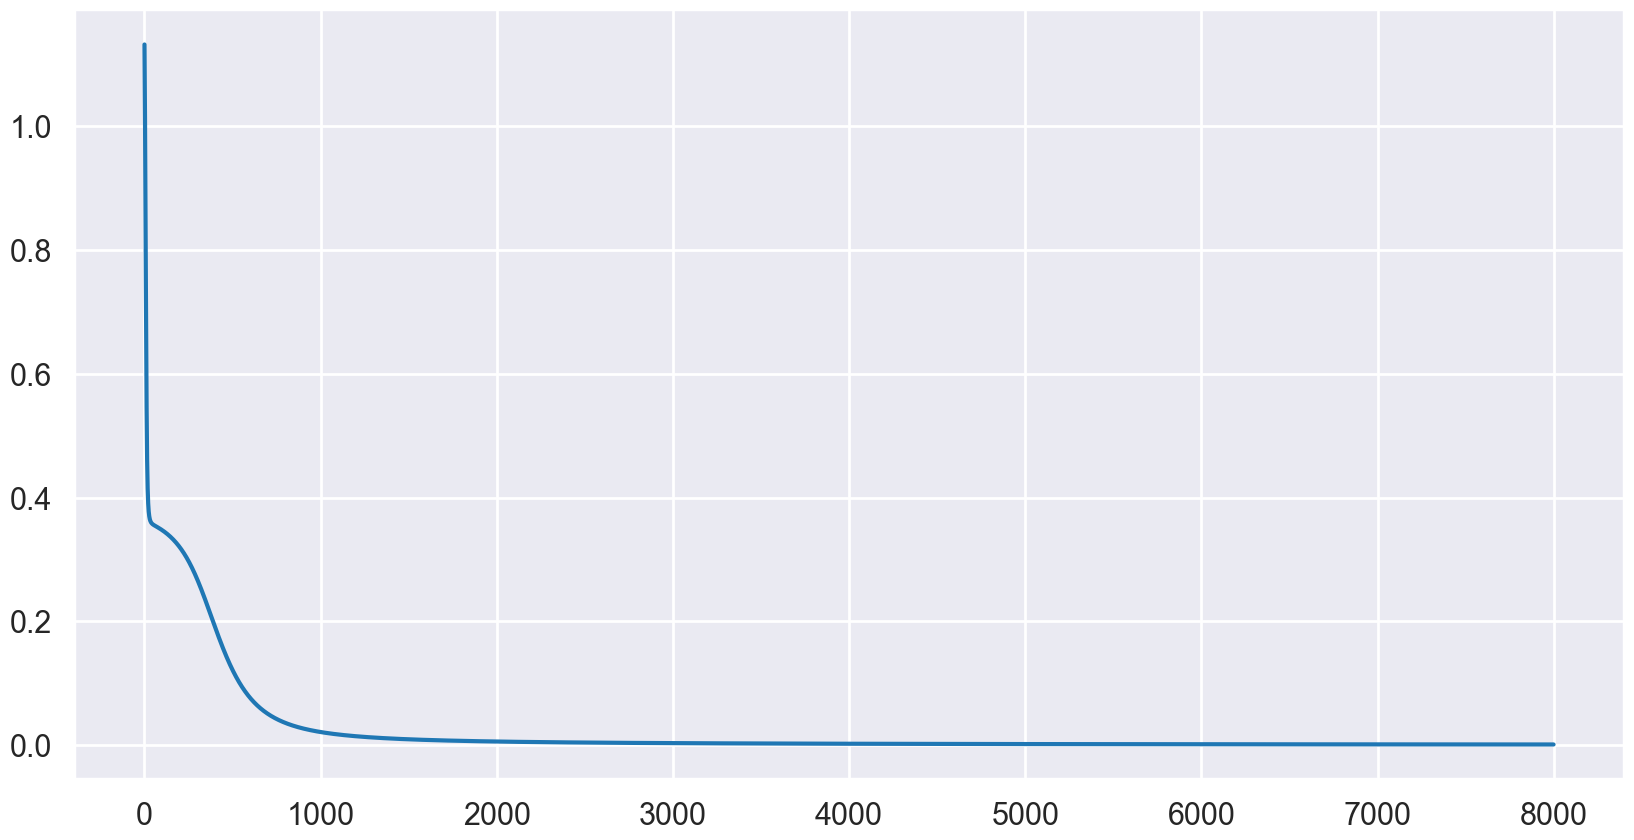

In [57]:
_ = plt.plot(mlp.losses)

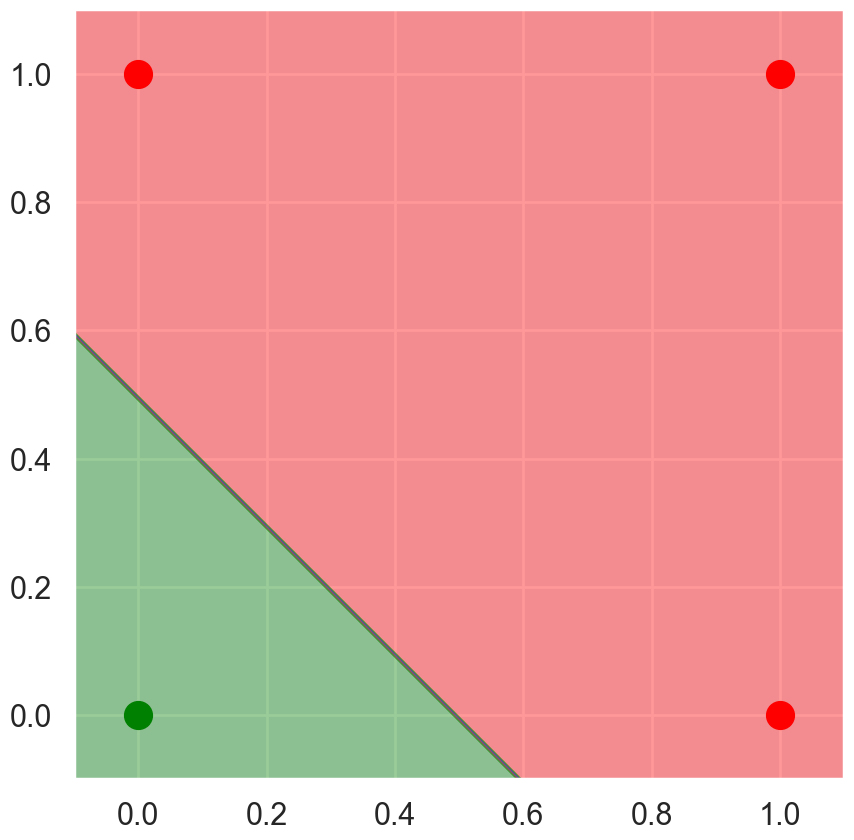

In [58]:
mlp.plot()